# Kawasaki Z900RS Youtube Review Video - Sentiment Analysis 

### Website: [Youtube Channel](https://www.youtube.com/@TheMissendenFlyer)
### Data source: [Kawasaki Z900RS Review](https://www.youtube.com/watch?v=URCzkGH15vM&t=412s)

In [297]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://storage.kawasaki.eu/public/kawasaki.eu/en-EU/model/18ZR900C_40RBN1DRS00D_A.png")

**A little bit of History**

The Kawasaki Z900RS is a tribute to Kawasaki's legendary Z1, a groundbreaking model first launched in 1972 that set new standards in performance and style for large-displacement bikes. The Z1 was famous for its 903cc inline-four engine, which was one of the most powerful and advanced engines of its time, delivering exceptional power and durability. The bike’s bold styling and aggressive performance quickly earned it a loyal following and helped Kawasaki establish its reputation for high-performance motorcycles.

Reviving this heritage, Kawasaki introduced the Z900RS in 2018 to capture the spirit of the Z1 while updating it with modern engineering. The Z900RS retains retro elements like the teardrop-shaped tank, round headlight, and minimalist bodywork, echoing the design cues of the original. However, it’s equipped with a 948cc liquid-cooled inline-four engine, producing smooth, linear power, perfect for both relaxed cruising and dynamic riding.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import datetime as dt
pd.options.mode.chained_assignment = None

### 1. Exploring Data

In [2]:
import json

In [37]:
with open ("my api key.json") as config_file:
    config=json.load(config_file)

In [162]:
api_key=config["API_KEY"]
video_id="URCzkGH15vM"

In [28]:
import googleapiclient
from googleapiclient.discovery import build

In [163]:
youtube = build('youtube', 'v3', developerKey=api_key)

def get_comments(youtube, video_id):
    comments = []
    # Requiring comments
    request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        textFormat='plainText'
    )

    # Execute the request and go through the comment pages
    while request:
        response = request.execute()
    
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
        
        # Is there a next page?
        request = youtube.commentThreads().list_next(request, response)

    return comments

In [298]:
# Obtaining comments

comments = get_comments(youtube, video_id)

In [299]:
# Migrating the comments to a dataframe

df=pd.DataFrame(comments,columns=["comments"])
df

,comments
0,Thanks for the tip - don’t buy an ex demo bike...
1,Thanks Andy it looks like a proper bike. Excel...
2,"If, when I can afford to splash out, this is m..."
3,Great looking retro bike shame about the radia...
4,"I know they're completely different bikes , bu..."
...,...
655,Keep up the good work missendenflyer! Love all...
656,That is a gorgeous bike
657,Awesome. I have been waiting for you to review...
658,Lovely lovely lovely ... please tell my bandi...


In [300]:
print(f"There are {len(df):,} comments.")

There are 660 comments.


### Analysis

To proceed with the sentiment analysis im going to break this in many steps:

1. WordCloud: A visual representation of text data, where the size of each word indicates its frequency or importance within a given context.
2. Sentiment Analysis: A natural language processing model to categorize comments as positive, negative, or neutral.
3. Most relevant topics

#### 1. WordCloud

In [43]:
# Importing Libraries

import string
import nltk
import yake
import wordcloud
from nltk.corpus import stopwords
nltk.download("stopwords")
from wordcloud import WordCloud
from langdetect import detect, LangDetectException

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diazc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [301]:
# Step 1: Casting comments lo lower

df["comments"]=df["comments"].str.lower()
df

,comments
0,thanks for the tip - don’t buy an ex demo bike...
1,thanks andy it looks like a proper bike. excel...
2,"if, when i can afford to splash out, this is m..."
3,great looking retro bike shame about the radia...
4,"i know they're completely different bikes , bu..."
...,...
655,keep up the good work missendenflyer! love all...
656,that is a gorgeous bike
657,awesome. i have been waiting for you to review...
658,lovely lovely lovely ... please tell my bandi...


In [45]:
# Step 2: Removing punctuation and digits

exclist=string.punctuation+string.digits
exclist

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [302]:
# Applying the exclution list

for i in exclist:
   df["comments"]=df["comments"].str.replace(i,"")
df

,comments
0,thanks for the tip don’t buy an ex demo bike 😂😂
1,thanks andy it looks like a proper bike excell...
2,if when i can afford to splash out this is my ...
3,great looking retro bike shame about the radia...
4,i know theyre completely different bikes but ...
...,...
655,keep up the good work missendenflyer love all ...
656,that is a gorgeous bike
657,awesome i have been waiting for you to review ...
658,lovely lovely lovely please tell my bandit ...


In [47]:
# Detecting language for each comment

def f(x):
    try:
        result = detect(str(x))
    except LangDetectException as e:
        result = str(e)
    return result

In [303]:
df["language"]=df["comments"].apply(f)

In [304]:
df

,comments,language
0,thanks for the tip don’t buy an ex demo bike 😂😂,en
1,thanks andy it looks like a proper bike excell...,en
2,if when i can afford to splash out this is my ...,en
3,great looking retro bike shame about the radia...,en
4,i know theyre completely different bikes but ...,en
...,...,...
655,keep up the good work missendenflyer love all ...,en
656,that is a gorgeous bike,en
657,awesome i have been waiting for you to review ...,en
658,lovely lovely lovely please tell my bandit ...,en


In [307]:
# Filtering comments by english

english_reviews=df[df["language"]=="en"]
english_reviews

,comments,language
0,thanks for the tip don’t buy an ex demo bike 😂😂,en
1,thanks andy it looks like a proper bike excell...,en
2,if when i can afford to splash out this is my ...,en
3,great looking retro bike shame about the radia...,en
4,i know theyre completely different bikes but ...,en
...,...,...
655,keep up the good work missendenflyer love all ...,en
656,that is a gorgeous bike,en
657,awesome i have been waiting for you to review ...,en
658,lovely lovely lovely please tell my bandit ...,en


In [308]:
# Step 3: Apply Stop Words in comments

stop_words=stopwords.words("english")

In [363]:
# Creating a personalized stopwords list that I know will disrupt the extraction of the Key Words

my_stopwords=["bike","bikes","kawasaki","review","tmf","triumph","zrs","speed twin","video","speed","reviews"]
stop_words.extend(my_stopwords)

In [320]:
"bike" and "kawasaki" in stop_words

True

In [364]:
del english_reviews["keywords"]

In [365]:
english_reviews['stopwords'] =english_reviews['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
english_reviews

,comments,language,stopwords
0,thanks for the tip don’t buy an ex demo bike 😂😂,en,thanks tip don’t buy ex demo 😂😂
1,thanks andy it looks like a proper bike excell...,en,thanks andy looks like proper excellent
2,if when i can afford to splash out this is my ...,en,afford splash next
3,great looking retro bike shame about the radia...,en,great looking retro shame radiator filler cap ...
4,i know theyre completely different bikes but ...,en,know theyre completely different im speedmaste...
...,...,...,...
655,keep up the good work missendenflyer love all ...,en,keep good work missendenflyer love professional
656,that is a gorgeous bike,en,gorgeous
657,awesome i have been waiting for you to review ...,en,awesome waiting one thanks mate
658,lovely lovely lovely please tell my bandit ...,en,lovely lovely lovely please tell bandit owning...


In [366]:
# Step 4: Extract Keywords

language = 'en'
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 6
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,dedupLim=deduplication_threshold,top=numOfKeywords, features=None)
extract_keywords = lambda x: ",".join(k[0] for k in custom_kw_extractor.extract_keywords(x))
english_reviews.loc[:,'keywords'] = english_reviews['stopwords'].apply(extract_keywords)
english_reviews["keywords"]=english_reviews["keywords"].str.title()

In [367]:
english_reviews

,comments,language,stopwords,keywords
0,thanks for the tip don’t buy an ex demo bike 😂😂,en,thanks tip don’t buy ex demo 😂😂,"Buy Ex Demo,Tip Do N’T,N’T Buy,Demo,Tip,N’T"
1,thanks andy it looks like a proper bike excell...,en,thanks andy looks like proper excellent,"Proper Excellent,Excellent,Andy,Proper"
2,if when i can afford to splash out this is my ...,en,afford splash next,"Afford Splash,Afford,Splash"
3,great looking retro bike shame about the radia...,en,great looking retro shame radiator filler cap ...,"Retro Shame Radiator,Shame Radiator Filler,Rad..."
4,i know theyre completely different bikes but ...,en,know theyre completely different im speedmaste...,"Speedmasterwhat Concern Quality,Concern Qualit..."
...,...,...,...,...
655,keep up the good work missendenflyer love all ...,en,keep good work missendenflyer love professional,"Missendenflyer Love Professional,Good Work Mis..."
656,that is a gorgeous bike,en,gorgeous,Gorgeous
657,awesome i have been waiting for you to review ...,en,awesome waiting one thanks mate,"Awesome Waiting,Awesome,Mate,Waiting"
658,lovely lovely lovely please tell my bandit ...,en,lovely lovely lovely please tell bandit owning...,"Bandit Owning Mate,Lovely Lovely Lovely,Lovely..."


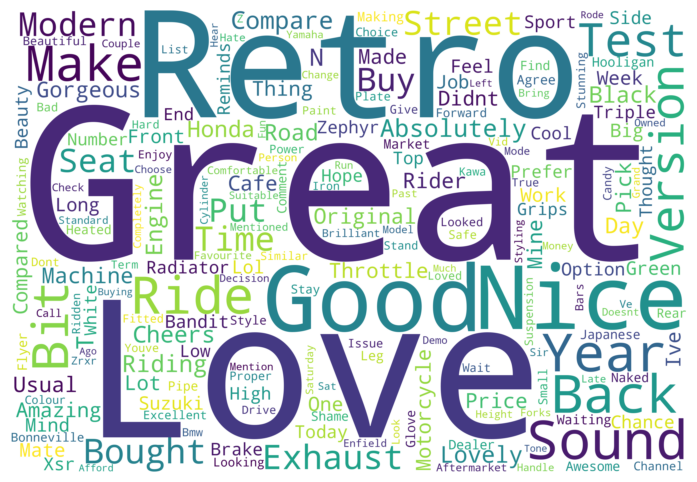

In [368]:
# Step 5: Create the Word Cloud

text=",".join(comment for comment in english_reviews.keywords)
my_wordcloud= WordCloud(collocations = False, background_color = 'white',width = 3048, height = 2080).generate(text)
plt.figure(figsize=(10,6))
plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- The words "retro," "great," and "love" reveal that people are particularly drawn to its nostalgic design, blending classic styling with modern performance. 
- This indicates that fans and potential buyers see the Z900RS not only as a capable motorcycle but also as a passion-driven choice, valued for both its heritage-inspired look and its high-quality ride experience.
- The words "Good" and "Nice" might emphasize a positive consensus about both its design and ride quality. These terms suggest that the bike strikes a chord with enthusiasts who appreciate not just its vintage aesthetic, but also the overall experience and attention to detail Kawasaki has put into the model, making it a highly regarded option among fans.

#### 2. Sentiment Analysis

2.1 with **TextBlob**

In [369]:
# Obtaining Library

from textblob import TextBlob

In [370]:
english_reviews

,comments,language,stopwords,keywords
0,thanks for the tip don’t buy an ex demo bike 😂😂,en,thanks tip don’t buy ex demo 😂😂,"Buy Ex Demo,Tip Do N’T,N’T Buy,Demo,Tip,N’T"
1,thanks andy it looks like a proper bike excell...,en,thanks andy looks like proper excellent,"Proper Excellent,Excellent,Andy,Proper"
2,if when i can afford to splash out this is my ...,en,afford splash next,"Afford Splash,Afford,Splash"
3,great looking retro bike shame about the radia...,en,great looking retro shame radiator filler cap ...,"Retro Shame Radiator,Shame Radiator Filler,Rad..."
4,i know theyre completely different bikes but ...,en,know theyre completely different im speedmaste...,"Speedmasterwhat Concern Quality,Concern Qualit..."
...,...,...,...,...
655,keep up the good work missendenflyer love all ...,en,keep good work missendenflyer love professional,"Missendenflyer Love Professional,Good Work Mis..."
656,that is a gorgeous bike,en,gorgeous,Gorgeous
657,awesome i have been waiting for you to review ...,en,awesome waiting one thanks mate,"Awesome Waiting,Awesome,Mate,Waiting"
658,lovely lovely lovely please tell my bandit ...,en,lovely lovely lovely please tell bandit owning...,"Bandit Owning Mate,Lovely Lovely Lovely,Lovely..."


In [371]:
# Function to obtain the sentiment

def get_sentiment(text):
    analysis = TextBlob(text)
    # Polarity: -1 (negative) a 1 (positive)

    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

In [372]:
# Apply function

english_reviews['sentiment'] = english_reviews['comments'].apply(get_sentiment)

In [373]:
english_reviews

,comments,language,stopwords,keywords,sentiment
0,thanks for the tip don’t buy an ex demo bike 😂😂,en,thanks tip don’t buy ex demo 😂😂,"Buy Ex Demo,Tip Do N’T,N’T Buy,Demo,Tip,N’T",Positive
1,thanks andy it looks like a proper bike excell...,en,thanks andy looks like proper excellent,"Proper Excellent,Excellent,Andy,Proper",Positive
2,if when i can afford to splash out this is my ...,en,afford splash next,"Afford Splash,Afford,Splash",Neutral
3,great looking retro bike shame about the radia...,en,great looking retro shame radiator filler cap ...,"Retro Shame Radiator,Shame Radiator Filler,Rad...",Positive
4,i know theyre completely different bikes but ...,en,know theyre completely different im speedmaste...,"Speedmasterwhat Concern Quality,Concern Qualit...",Neutral
...,...,...,...,...,...
655,keep up the good work missendenflyer love all ...,en,keep good work missendenflyer love professional,"Missendenflyer Love Professional,Good Work Mis...",Positive
656,that is a gorgeous bike,en,gorgeous,Gorgeous,Positive
657,awesome i have been waiting for you to review ...,en,awesome waiting one thanks mate,"Awesome Waiting,Awesome,Mate,Waiting",Positive
658,lovely lovely lovely please tell my bandit ...,en,lovely lovely lovely please tell bandit owning...,"Bandit Owning Mate,Lovely Lovely Lovely,Lovely...",Positive


2.2 With **VADER Library**

In [374]:
# Obtaining Library

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\diazc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [375]:
sia = SentimentIntensityAnalyzer()

# Function to obtain sentiment
def get_sentiment_vader(text):
    score = sia.polarity_scores(text)
    # Defining labels
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applying Function

english_reviews['sentiment'] = english_reviews['comments'].apply(get_sentiment_vader)

In [376]:
english_reviews

,comments,language,stopwords,keywords,sentiment
0,thanks for the tip don’t buy an ex demo bike 😂😂,en,thanks tip don’t buy ex demo 😂😂,"Buy Ex Demo,Tip Do N’T,N’T Buy,Demo,Tip,N’T",Positive
1,thanks andy it looks like a proper bike excell...,en,thanks andy looks like proper excellent,"Proper Excellent,Excellent,Andy,Proper",Positive
2,if when i can afford to splash out this is my ...,en,afford splash next,"Afford Splash,Afford,Splash",Neutral
3,great looking retro bike shame about the radia...,en,great looking retro shame radiator filler cap ...,"Retro Shame Radiator,Shame Radiator Filler,Rad...",Positive
4,i know theyre completely different bikes but ...,en,know theyre completely different im speedmaste...,"Speedmasterwhat Concern Quality,Concern Qualit...",Positive
...,...,...,...,...,...
655,keep up the good work missendenflyer love all ...,en,keep good work missendenflyer love professional,"Missendenflyer Love Professional,Good Work Mis...",Positive
656,that is a gorgeous bike,en,gorgeous,Gorgeous,Positive
657,awesome i have been waiting for you to review ...,en,awesome waiting one thanks mate,"Awesome Waiting,Awesome,Mate,Waiting",Positive
658,lovely lovely lovely please tell my bandit ...,en,lovely lovely lovely please tell bandit owning...,"Bandit Owning Mate,Lovely Lovely Lovely,Lovely...",Positive


**Adding a Score Column**

In [378]:
from transformers import pipeline

In [379]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [380]:
english_reviews['score'] = english_reviews['comments'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

In [381]:
english_reviews

,comments,language,stopwords,keywords,sentiment,score
0,thanks for the tip don’t buy an ex demo bike 😂😂,en,thanks tip don’t buy ex demo 😂😂,"Buy Ex Demo,Tip Do N’T,N’T Buy,Demo,Tip,N’T",Positive,1 star
1,thanks andy it looks like a proper bike excell...,en,thanks andy looks like proper excellent,"Proper Excellent,Excellent,Andy,Proper",Positive,5 stars
2,if when i can afford to splash out this is my ...,en,afford splash next,"Afford Splash,Afford,Splash",Neutral,3 stars
3,great looking retro bike shame about the radia...,en,great looking retro shame radiator filler cap ...,"Retro Shame Radiator,Shame Radiator Filler,Rad...",Positive,4 stars
4,i know theyre completely different bikes but ...,en,know theyre completely different im speedmaste...,"Speedmasterwhat Concern Quality,Concern Qualit...",Positive,3 stars
...,...,...,...,...,...,...
655,keep up the good work missendenflyer love all ...,en,keep good work missendenflyer love professional,"Missendenflyer Love Professional,Good Work Mis...",Positive,5 stars
656,that is a gorgeous bike,en,gorgeous,Gorgeous,Positive,5 stars
657,awesome i have been waiting for you to review ...,en,awesome waiting one thanks mate,"Awesome Waiting,Awesome,Mate,Waiting",Positive,5 stars
658,lovely lovely lovely please tell my bandit ...,en,lovely lovely lovely please tell bandit owning...,"Bandit Owning Mate,Lovely Lovely Lovely,Lovely...",Positive,5 stars


In [270]:
filter=(english_reviews["score"]=="1 star")|(english_reviews["score"]=="2 stars")
english_reviews[filter]

,comments,language,stopwords,keywords,sentiment,score
0,thanks for the tip don’t buy an ex demo bike 😂😂,en,thanks tip don’t buy ex demo 😂😂,"Buy Ex Demo,Tip Do N’T,N’T Buy,Demo,Tip,N’T",Positive,1 star
5,shame about the billboard of a number plate it...,en,shame billboard number plate completely spoils...,"Shame Billboard Number,Petition Government Rev...",Negative,1 star
10,i cant think of a better way to spend ten gran...,en,cant think better way spend ten grand true,"Ten Grand True,Spend Ten Grand,Grand True,Spen...",Positive,2 stars
13,im and im getting my new zrs candytone blue i...,en,im im getting new zrs candytone blue july god ...,"July God Exited,Zrs Candytone Blue,Candytone B...",Positive,1 star
29,as an american i got anxiety watching this vid...,en,american got anxiety watching video simply jag...,"Anxiety Watching Video,Watching Video Simply,V...",Positive,1 star
...,...,...,...,...,...,...
618,ooh been looking forward to this one,en,ooh looking forward one,"Ooh Looking Forward,Ooh,Forward",Neutral,1 star
621,you know youre on the right way when youre beh...,en,know youre right way youre behind white van ha...,"Bikes Wantonefactor High,Dangerous Work Testin...",Positive,1 star
624,i really do not know how im not going to buy a...,en,really know im going buy zrsive drooling thing...,"Buy Zrsive Drooling,Zrsive Drooling Thing,Droo...",Positive,1 star
627,ahhh you finally got one,en,ahhh finally got one,"Ahhh Finally,Ahhh,Finally",Neutral,1 star


2.3 **Sentiment Visualizations**

In [382]:
sentiment_counts_= english_reviews["sentiment"].value_counts()
sentiment_counts_

sentiment
Positive    460
Neutral      80
Negative     74
Name: count, dtype: int64

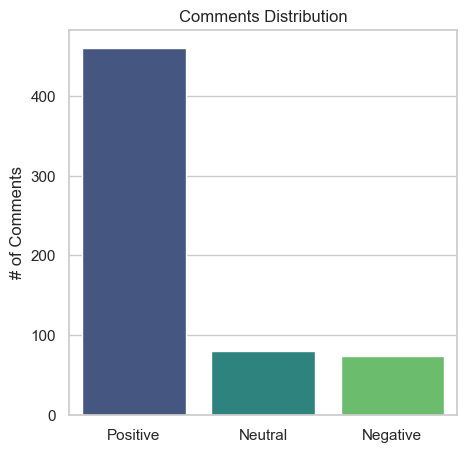

In [383]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.barplot(x=sentiment_counts_.index, y=sentiment_counts_.values, palette="viridis")
plt.xlabel("")
plt.ylabel("# of Comments")
plt.title("Comments Distribution")
plt.show()

In [384]:
sentiment_counts= english_reviews.groupby(["sentiment"],as_index=False)["comments"].count().rename(columns=({"comments":"total"}))

In [385]:
import plotly_express as px

In [386]:
color_map = {
    "Positive": "green",
    "Negative": "red",
    "Neutral": "blue"
}

fig=px.bar(sentiment_counts,x="sentiment",y="total",color="sentiment",text="total",color_discrete_map=color_map)
fig.update_layout(width=800, height=600)
fig.show()

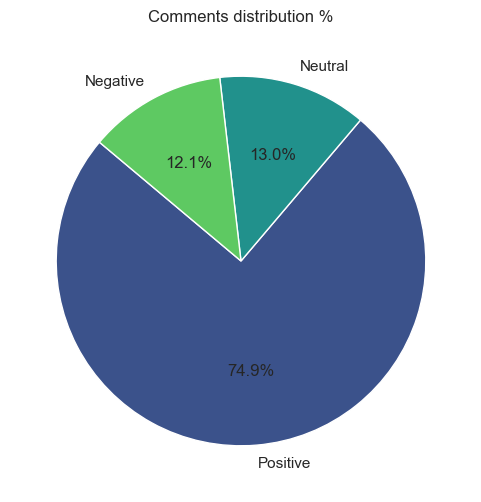

In [387]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts_, labels=sentiment_counts_.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", 3))
plt.title("Comments distribution %")
plt.show()

In [388]:
sentiment_counts

,sentiment,total
0,Negative,74
1,Neutral,80
2,Positive,460


In [389]:
fig=px.pie(sentiment_counts,names="sentiment",values="total",color="sentiment",color_discrete_map=color_map)
fig.update_layout(width=800, height=600)
fig.show()

In [390]:
total_comments = sentiment_counts['total'].sum()
positive_comments=sentiment_counts.loc[sentiment_counts["sentiment"]=="Positive","total"].values[0]
negative_comments=sentiment_counts.loc[sentiment_counts["sentiment"]=="Negative","total"].values[0]
neutral_comments=sentiment_counts.loc[sentiment_counts["sentiment"]=="Neutral","total"].values[0]

In [391]:
positive_percentage = (positive_comments / total_comments) * 100
negative_percentage = (negative_comments / total_comments) * 100

In [406]:
from IPython.display import Markdown, display

In [409]:
markdown_text = f"""

These results reflect a mostly positive perception around the Kawasaki Z900RS, with {positive_percentage:.1f}% positive comments compared to {negative_percentage:.1f}% negative comments.


- **Positive Sentiment:** With {positive_comments:,} positive comments, the overwhelming positive sentiment suggests that a significant majority of viewers appreciate the motorcycle, highlighting its strengths and overall appeal.

- **Neutral Sentiment:** The presence of {neutral_comments:,} neutral comments could imply that many viewers had mixed feelings or were indifferent, possibly discussing factual aspects without strong emotional reactions. This might reflect a more analytical or objective approach to their reviews.

- **Negative Sentiment:** While there are {negative_comments:,} negative comments, they represent a smaller portion of the overall feedback. This indicates that, despite some criticisms, the positive impressions significantly outweigh the negative ones.

Overall, the analysis showcases that the Z900RS resonates well with many riders, reinforcing its position as a desirable motorcycle, while also inviting further exploration into the reasons behind the neutral and negative sentiments. This could provide valuable insights for Kawasaki regarding areas for improvement or potential concerns from the community.
"""
display(Markdown(markdown_text))



These results reflect a mostly positive perception around the Kawasaki Z900RS, with 74.9% positive comments compared to 12.1% negative comments.


- **Positive Sentiment:** With 460 positive comments, the overwhelming positive sentiment suggests that a significant majority of viewers appreciate the motorcycle, highlighting its strengths and overall appeal.

- **Neutral Sentiment:** The presence of 80 neutral comments could imply that many viewers had mixed feelings or were indifferent, possibly discussing factual aspects without strong emotional reactions. This might reflect a more analytical or objective approach to their reviews.

- **Negative Sentiment:** While there are 74 negative comments, they represent a smaller portion of the overall feedback. This indicates that, despite some criticisms, the positive impressions significantly outweigh the negative ones.

Overall, the analysis showcases that the Z900RS resonates well with many riders, reinforcing its position as a desirable motorcycle, while also inviting further exploration into the reasons behind the neutral and negative sentiments. This could provide valuable insights for Kawasaki regarding areas for improvement or potential concerns from the community.


**ANALYZING THE NEGATIVE COMMENTS**

Let's dive in into the negative comments

In [443]:
# Filtering Negative sentiment and ruling out 3 stars

filter=(english_reviews["sentiment"]=="Negative")&((english_reviews["score"]=="1 star")|(english_reviews["score"]=="2 stars"))
negative_comments_df=english_reviews[filter]
negative_comments_df

,comments,language,stopwords,keywords,sentiment,score
5,shame about the billboard of a number plate it...,en,shame billboard number plate completely spoils...,"Shame Billboard Number,Petition Government Rev...",Negative,1 star
30,fugly that high clearance fender in the rear ...,en,fugly high clearance fender rear belongs dirt ...,"Rear Belongs Dirt,Belongs Dirt Street,Dirt Str...",Negative,1 star
65,im turning into a bit of a hooligan flyer says...,en,im turning bit hooligan flyer says least hooli...,"Hooligan Tone Time,Turning Bit Hooligan,Bit Ho...",Negative,1 star
85,thank god they didn’t put that old ugly as f e...,en,thank god didn’t put old ugly f exhaust would ...,"Ruin Entire,God Did N’T,N’T Put,Put Old Ugly,U...",Negative,1 star
110,what no centre stand therefore im out,en,centre stand therefore im,"Centre Stand,Centre,Stand",Negative,1 star
159,isn’t it sad to see the state of our roads thr...,en,isn’t sad see state roads abington potholes pa...,"State Roads Abington,Roads Abington Potholes,A...",Negative,2 stars
160,torn really the zzr is the target however it i...,en,torn really zzr target however fazed end year ...,"Fazed End Year,Torn Really Zzr,Thousand Cc Vfr...",Negative,2 stars
172,so sorry you didnt do a followup to this video,en,sorry didnt followup,"Didnt Followup,Followup,Didnt",Negative,1 star
173,wtf with that plate dude nd front light no way,en,wtf plate dude nd front light way,"Wtf Plate Dude,Wtf Plate,Plate Dude,Dude Nd Fr...",Negative,1 star
177,evening \nso given the choice xsr or the z r...,en,evening given choice xsr z rs torn two,"Evening Given Choice,Choice Xsr,Evening,Choice...",Negative,2 stars


In [504]:
my_stopwords=["didnt","doesnt","bad"]
stop_words.extend(my_stopwords)

In [505]:
negative_comments_df["stopwords"]= negative_comments_df["comments"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [506]:
language = 'en'
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 6
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,dedupLim=deduplication_threshold,top=numOfKeywords, features=None)
extract_keywords = lambda x: ",".join(k[0] for k in custom_kw_extractor.extract_keywords(x))
negative_comments_df['keywords'] = negative_comments_df['stopwords'].apply(extract_keywords)
negative_comments_df["keywords"]=negative_comments_df["keywords"].str.title()

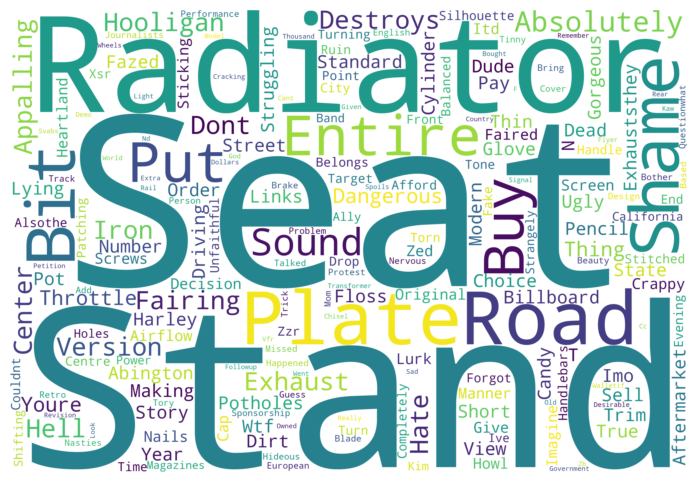

In [507]:
text=",".join(comment for comment in negative_comments_df.keywords)
my_wordcloud= WordCloud(collocations = False, background_color = 'white',width = 3048, height = 2080).generate(text)
plt.figure(figsize=(10,6))
plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud of negative comments reveals some specific areas of concern among users regarding the Kawasaki Z900RS.

 - **"Seat":** The frequent mention of "seat" likely points to discomfort or issues with seating ergonomics. This suggests that some riders may find the seat inadequate for long rides, indicating a potential area for improvement in design or comfort features.

- **"Radiator":** The word "radiator" could reflect concerns about overheating or cooling efficiency. Riders may have experienced issues related to heat management, especially in stop-and-go traffic or during prolonged use, which could affect their overall riding experience. Some people over the internet were complaining about overheating issues. "she runs Hot" [Link](https://www.z900rs.co.uk/index.php?topic=4104.0) titles a chat board and another one titles "Bike Running hot" [Link](https://www.z900rs.co.uk/index.php?topic=474.0) however most of the comments points that these temperatures on the indicator are normal. 

- **"Stand":**  likely points to the fact that the Kawasaki Z900RS does not come with a central stand as a standard feature. This can be a drawback for some riders who prefer the convenience of a central stand for parking, maintenance, or stability when stationary.Without a central stand, users may find it less convenient to perform maintenance tasks or store the bike securely. This practical consideration could lead to some frustration among riders, especially those accustomed to motorcycles that include this feature.

In summary, while the Z900RS is generally well-received, these negative comments highlight specific aspects that some riders find problematic. Addressing these issues could enhance user satisfaction and overall performance, providing Kawasaki with valuable feedback for future model iterations or improvements.

**ANALYZING THE POSITIVE COMMENTS**

Let's dive in into the positive comments

In [471]:
# Filtering Positive sentiment and ruling out 3 stars

filter=(english_reviews["sentiment"]=="Positive")&((english_reviews["score"]=="5 stars")|(english_reviews["score"]=="4 stars"))
positive_comments_df=english_reviews[filter]
positive_comments_df

,comments,language,stopwords,keywords,sentiment,score
1,thanks andy it looks like a proper bike excell...,en,thanks andy looks like proper excellent,"Proper Excellent,Excellent,Andy,Proper",Positive,5 stars
3,great looking retro bike shame about the radia...,en,great looking retro shame radiator filler cap ...,"Retro Shame Radiator,Shame Radiator Filler,Rad...",Positive,4 stars
8,great review thanks a lot so no cruise wooden ...,en,great thanks lot cruise wooden brakes buying n...,"Lot Cruise Wooden,Cruise Wooden Brakes,Wooden ...",Positive,4 stars
9,added some fine tuning shorts to my channel\nc...,en,added fine tuning shorts channel courtesy va b...,"Added Fine Tuning,Fine Tuning Shorts,Tuning Sh...",Positive,4 stars
11,the best all around bike u can buy\nand will o...,en,best around u buy last market get heated grips...,"Heated Grips Bars,Grips Bars Ecu,Bars Ecu Flas...",Positive,5 stars
...,...,...,...,...,...,...
654,great to hear your views on this bike thought ...,en,great hear views thought might like abingdon y...,"Great Hear Views,Hear Views Thought,Abingdon Y...",Positive,5 stars
655,keep up the good work missendenflyer love all ...,en,keep good work missendenflyer love professional,"Missendenflyer Love Professional,Good Work Mis...",Positive,5 stars
656,that is a gorgeous bike,en,gorgeous,Gorgeous,Positive,5 stars
657,awesome i have been waiting for you to review ...,en,awesome waiting one thanks mate,"Awesome Waiting,Awesome,Mate,Waiting",Positive,5 stars


In [ ]:
my_stopwords=["didnt","doesnt"]
stop_words.extend(my_stopwords)

In [472]:
positive_comments_df["stopwords"]= positive_comments_df["comments"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [476]:
language = 'en'
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 6
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,dedupLim=deduplication_threshold,top=numOfKeywords, features=None)
extract_keywords = lambda x: ",".join(k[0] for k in custom_kw_extractor.extract_keywords(x))
positive_comments_df['keywords'] = positive_comments_df['stopwords'].apply(extract_keywords)
positive_comments_df["keywords"]=positive_comments_df["keywords"].str.title()

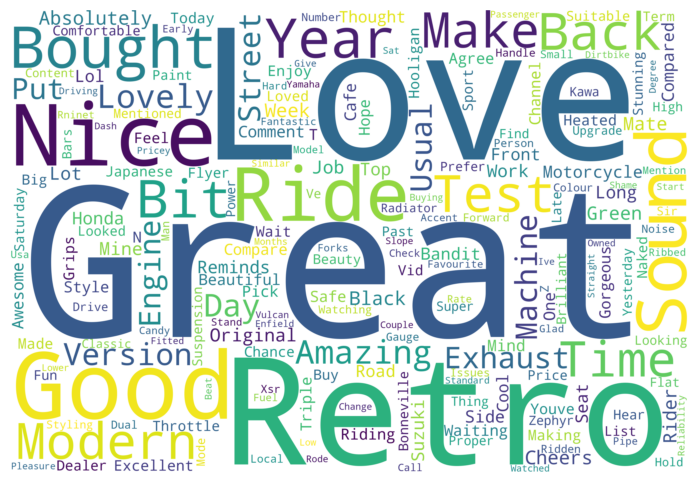

In [477]:
text=",".join(comment for comment in positive_comments_df.keywords)
my_wordcloud= WordCloud(collocations = False, background_color = 'white',width = 3048, height = 2080).generate(text)
plt.figure(figsize=(10,6))
plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Findings:

- **Emotional Connection:** The words "Love" and "Great" reflect a strong emotional attachment to the bike, indicating that many riders have a deep appreciation for their experience with the Z900RS. This suggests that the motorcycle resonates well with its audience on a personal level.

- **Nostalgic Appeal:** The inclusion of "Retro" indicates that riders value the classic design elements that harken back to Kawasaki’s heritage. This blend of nostalgia with modern performance likely attracts both seasoned riders and those who appreciate the vintage aesthetic.

- **Modern Features:** The word "Modern" suggests that users recognize and appreciate the contemporary technology and features integrated into the bike. This combination of retro styling with modern performance and amenities appeals to a wide range of riders.

- **Exhaust Note:** The mention of "Exhaust" may imply that riders enjoy the sound and performance of the bike's exhaust system, which can enhance the overall riding experience. A pleasing exhaust note is often a significant factor for motorcycle enthusiasts.

Overall, the Z900RS is well-loved for its combination of nostalgic design, modern technology, and engaging performance, making it a standout choice for many riders.

#### 3 Relevant Topics

In [480]:
# Importing Libraries

from nltk.tokenize import word_tokenize
nltk.download('punkt')
from gensim import corpora

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diazc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [493]:
def preprocess_comment(comment):
    words = word_tokenize(comment.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

english_reviews['topics'] = english_reviews['keywords'].apply(preprocess_comment)

In [500]:
dictionary = corpora.Dictionary(english_reviews['topics'])
corpus = [dictionary.doc2bow(comment) for comment in english_reviews['topics']]

In [501]:
english_reviews

,comments,language,stopwords,keywords,sentiment,score,topics
0,thanks for the tip don’t buy an ex demo bike 😂😂,en,thanks tip don’t buy ex demo 😂😂,"Buy Ex Demo,Tip Do N’T,N’T Buy,Demo,Tip,N’T",Positive,1 star,"[buy, ex, demo, tip, n, n, buy, demo, tip, n]"
1,thanks andy it looks like a proper bike excell...,en,thanks andy looks like proper excellent,"Proper Excellent,Excellent,Andy,Proper",Positive,5 stars,"[proper, excellent, excellent, andy, proper]"
2,if when i can afford to splash out this is my ...,en,afford splash next,"Afford Splash,Afford,Splash",Neutral,3 stars,"[afford, splash, afford, splash]"
3,great looking retro bike shame about the radia...,en,great looking retro shame radiator filler cap ...,"Retro Shame Radiator,Shame Radiator Filler,Rad...",Positive,4 stars,"[retro, shame, radiator, shame, radiator, fill..."
4,i know theyre completely different bikes but ...,en,know theyre completely different im speedmaste...,"Speedmasterwhat Concern Quality,Concern Qualit...",Positive,3 stars,"[speedmasterwhat, concern, quality, concern, q..."
...,...,...,...,...,...,...,...
655,keep up the good work missendenflyer love all ...,en,keep good work missendenflyer love professional,"Missendenflyer Love Professional,Good Work Mis...",Positive,5 stars,"[missendenflyer, love, professional, good, wor..."
656,that is a gorgeous bike,en,gorgeous,Gorgeous,Positive,5 stars,[gorgeous]
657,awesome i have been waiting for you to review ...,en,awesome waiting one thanks mate,"Awesome Waiting,Awesome,Mate,Waiting",Positive,5 stars,"[awesome, waiting, awesome, mate, waiting]"
658,lovely lovely lovely please tell my bandit ...,en,lovely lovely lovely please tell bandit owning...,"Bandit Owning Mate,Lovely Lovely Lovely,Lovely...",Positive,5 stars,"[bandit, owning, mate, lovely, lovely, lovely,..."


In [490]:
from gensim.models import LdaModel
import pyLDAvis.gensim_models
import pyLDAvis

In [510]:
# number of topics
num_topics = 2 

# Applying LDA Model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Show Topics
for idx, topic in lda_model.print_topics(num_words=5):
    print(f'Topic {idx + 1}: {topic}')

Topic 1: 0.026*"great" + 0.009*"ride" + 0.009*"good" + 0.009*"nice" + 0.007*"back"
Topic 2: 0.019*"love" + 0.011*"retro" + 0.008*"bit" + 0.007*"make" + 0.006*"absolutely"


In [511]:
# Showing LDA Model

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary,R=5)
pyLDAvis.display(vis)